In [71]:
#importing
from astropy.table import Table, join, unique, QTable, vstack
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.colors as colors
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
%matplotlib inline 


In [72]:
unimodal_table = Table.read('/users/EllaMathews/Summer-Research/data_for_unimodal_plots_200M.csv')

In [73]:
unimodal_table.info

<Table length=35>
  name    dtype 
-------- -------
      id   int64
    MCMC   int64
P_median float64
 P_lower float64
 P_upper float64
e_median float64
 e_lower float64
 e_upper float64

In [74]:
rot_6811 = Table.read('/users/Ellamathews/Summer-Research/RotationPeriodRV_6811.csv')
rot_6866 = Table.read('/users/EllaMathews/Summer-Research/RotationPeriodRV_6866.csv')

In [75]:
rot = vstack([rot_6866, rot_6811])

In [76]:
rot.info

<Table length=434>
  name   dtype     class     n_bad
------- ------- ------------ -----
   Gaia   int64       Column     0
    Per float64 MaskedColumn    44
  BP-RP float64       Column     0
   Gmag float64       Column     0
e_BP-RP float64       Column     0
 e_Gmag float64       Column     0
 num_RV   int64       Column     0

In [77]:
rot_info = Table()
rot_info['id'] = rot['Gaia']
rot_info['P'] = rot['Per']
rot_info.info

<Table length=434>
name  dtype     class     n_bad
---- ------- ------------ -----
  id   int64       Column     0
   P float64 MaskedColumn    44

In [78]:
all = vstack([rot_info, unimodal_table])

In [79]:
all.info

<Table length=469>
  name    dtype     class     n_bad
-------- ------- ------------ -----
      id   int64       Column     0
       P float64 MaskedColumn    79
    MCMC   int64 MaskedColumn   434
P_median float64 MaskedColumn   434
 P_lower float64 MaskedColumn   434
 P_upper float64 MaskedColumn   434
e_median float64 MaskedColumn   434
 e_lower float64 MaskedColumn   434
 e_upper float64 MaskedColumn   434

In [80]:
all.write('uniplot_rot_data_200M.csv', format = 'csv', overwrite = True)

Text(0.5, 1.0, 'e vs P for Unimodal Stars in ngc6811 and ngc6866')

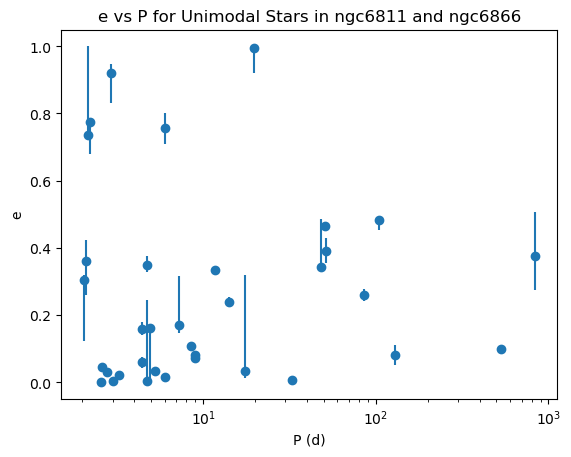

In [54]:
fig, ax = plt.subplots()
x = np.array(all['P_median'])
y = np.array(all['e_median'])
asymmetric_error_x = np.array([np.array(all['P_lower']), np.array(all['P_upper'])])
asymmetric_error_y = np.array([np.array(all['e_lower']), np.array(all['e_upper'])])
#print(asymmetric_error_y)

ax.errorbar(x, y, xerr = asymmetric_error_x, yerr = asymmetric_error_y, fmt = 'o')
plt.scatter(x, y, c = all['P'], zorder = 1)
plt.colorbar(scatter)
ax.set_xlabel('P (d)')
ax.set_xscale('log')
ax.set_ylabel('e')
ax.set_title('e vs P for Unimodal Stars in ngc6811 and ngc6866')